In [12]:
%pip install tabulate scikit-learn matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [13]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tabulate import tabulate



In [14]:
#We do an exploratory analysis
df = pd.read_csv("Salary_dataset.csv")
df.head(6)


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0


In [15]:
#After checking the data we need to check for NULL values
df.isnull().sum()
#Since there is no NULL values we can proceed with our data cleaning

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [16]:
#First we have to clean some data droping the unnamed column as is an index from the CSV File and we dont need it
df = df.drop(columns=["Unnamed: 0"])
df.head(6)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0


Text(0.5, 1.0, 'Salary on Years Of Experience')

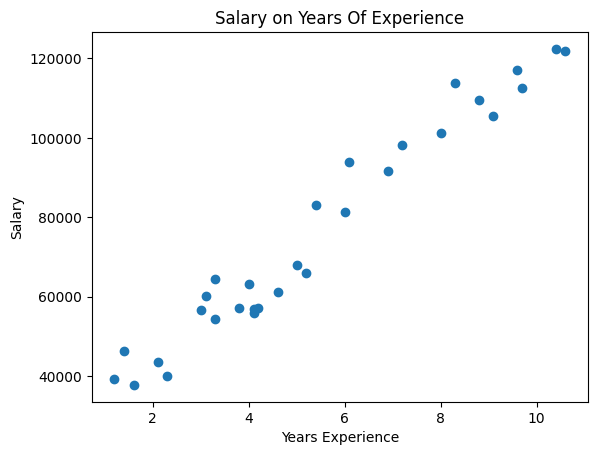

In [17]:
#We graph our dataset to see if there is an correlation with years of experience and the target variable: Salary
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Salary on Years Of Experience')
#As we can see there is a STRONG correlation in years of experience and salary outcome so we can start building the model

In [19]:
df['YearsExperience']

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

In [18]:
#We start constructing and training our model
model = LinearRegression()
Data = np.array(df['YearsExperience']).reshape(-1, 1)
print(Data)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]


In [20]:

Target = np.array(df['Salary'])   
print(Target)


[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [21]:
model.fit(Data,Target)
#we store the outpout of the model in a data frame
model_predict = model.predict(Data)


In [22]:

#we do a table of the actual and the predict data
table = np.column_stack((Target,model_predict))

#we show it to see how far our model predicts the results from the actual data
print(tabulate(table[:5], headers =("Actual Data","Predicted Data"), tablefmt = 'fancy_grid'))

╒═══════════════╤══════════════════╕
│   Actual Data │   Predicted Data │
╞═══════════════╪══════════════════╡
│         39344 │          36188.2 │
├───────────────┼──────────────────┤
│         46206 │          38078.2 │
├───────────────┼──────────────────┤
│         37732 │          39968.1 │
├───────────────┼──────────────────┤
│         43526 │          44693.1 │
├───────────────┼──────────────────┤
│         39892 │          46583.1 │
╘═══════════════╧══════════════════╛


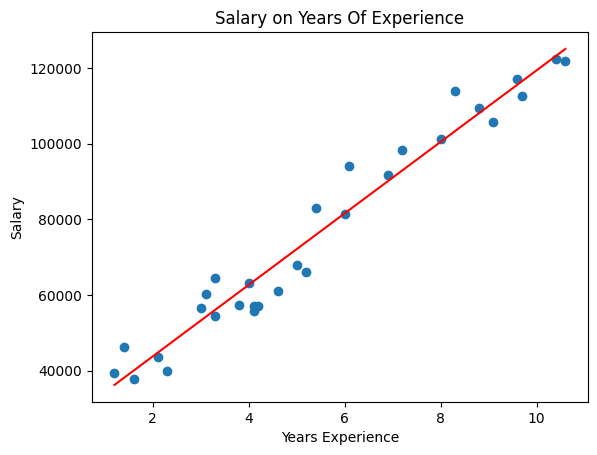

In [24]:
#We do the graph again but now with the linear regression plot to visualize it and how well it adheres to the model
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(df['YearsExperience'],model_predict,color='r')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Salary on Years Of Experience')
plt.show()

In [11]:
#Then we evaluate our model to see how good we did
R_squared = np.round(r2_score(Target, model_predict),4)
print("R squared: ",R_squared)

R squared:  0.957
